# Art analysis

- Use large labelled dataset from Kaggle, focussing on 19th+ century artists with many pictures 
- Transfer learning via fastai libraries to identify style, genre and artist
- Achieves c75% accuracy on all tasks

### Librararies and drives

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *

Updating fastai...
Done.


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Personal_projects/Art/'
path = Path(base_dir)

Mounted at /content/gdrive


In [4]:
art_info = pd.read_csv(base_dir + "train_df.csv")
art_info['path'] = 'train/' + art_info['new_filename'].astype(str)
print(art_info.shape)

(21763, 5)


In [5]:
# Replace self-portrait with portrait label

art_info['genre_mod'] = ['people and portraits' if x in ['portrait', 'self-portrait', 'genre painting'] else x for x in art_info['genre']]
art_info['style_mod'] = ['Impressionistic' if x in ['Impressionism', 'Post-Impressionism'] else 'Romanticism' if x in ['Romanticism', 'Neo-Romanticism'] else x for x in art_info['style']]
#art_info['style_mod'] = ['Romanticism' if x in ['Romanticism', 'Neo-Romanticism'] else x for x in art_info['style']]
art_info.head()

,new_filename,genre,style,artist,path,genre_mod,style_mod
0,99442.jpg,marina,Romanticism,Ivan Aivazovsky,train/99442.jpg,marina,Romanticism
1,81750.jpg,marina,Romanticism,Ivan Aivazovsky,train/81750.jpg,marina,Romanticism
2,82140.jpg,marina,Romanticism,Ivan Aivazovsky,train/82140.jpg,marina,Romanticism
3,74871.jpg,marina,Romanticism,Ivan Aivazovsky,train/74871.jpg,marina,Romanticism
4,7390.jpg,marina,Romanticism,Ivan Aivazovsky,train/7390.jpg,marina,Romanticism


In [0]:
sample_size = 1

# Could add mirror images to double size

In [0]:
# Filter for top 10 styles
#top_styles = art_info[['style','path']].groupby(['style']).count().sort_values(by ='path', ascending=False).head(10).reset_index()
#top10 = top_styles['style'].to_list()
#labels = art_info[art_info['style'].isin(top10)][['path','style']]

In [0]:
# Filter for top 10 styles
#top_styles = art_info[['style','path']].groupby(['style']).count().sort_values(by ='path', ascending=False).head(30).reset_index()
#top10 = top_styles['style'].to_list()
labels = art_info[['path','style_mod']]
labels = labels.sample(frac=sample_size)

In [9]:
labels.columns = ['path', 'label']
print(labels.shape)
labels.head()

(21763, 2)


,path,label
12239,train/25945.jpg,Realism
16038,train/19284.jpg,Realism
5495,train/35282.jpg,Surrealism
16333,train/72909.jpg,Art Nouveau (Modern)
6960,train/69150.jpg,Realism


In [0]:
#art_info.head()

In [11]:
art_info.groupby(['artist','style']).count()

new_filename  genre  path  genre_mod  style_mod
artist                        style                                                                   
 Wassily Kandinsky            Art Nouveau (Modern)                1      1     1          1          1
                              Expressionism                      32     32    32         32         32
                              Post-Impressionism                 18     18    18         18         18
Aleksey Savrasov              Realism                           183    183   183        183        183
Alfred Sisley                 Impressionism                     344    344   344        344        344
                              Post-Impressionism                  4      4     4          4          4
                              Realism                             7      7     7          7          7
Amedeo Modigliani             Expressionism                     255    255   255        255        255
Aubrey Beardsley              Art Nouveau (Modern)              177    177   177        177        177
Berthe Morisot                Impressionism                     166    166   166        166        166
                              Realism                             1      1     1          1          1
Boris Kustodiev               Art Nouveau (Modern)              122    122   122        122        122
                              Impressionism                      10     10    10         10         10
                              Naïve Art (Primitivism)             6      6     6          6          6
                              Realism                           219    219   219        219        219
Camille Corot                 Neoclassicism                       6      6     6          6          6
                              Realism                           324    324   324        324        324
                              Romanticism                        40     40    40         40         40
Camille Pissarro              Impressionism                     349    349   349        349        349
                              Realism                            20     20    20         20         20
Charles M. Russell            Romanticism                       194    194   194        194        194
Charles Turner                Romanticism                       182    182   182        182        182
Childe Hassam                 Impressionism                     370    370   370        370        370
                              Realism                             1      1     1          1          1
Claude Monet                  Impressionism                     381    381   381        381        381
                              Realism                             2      2     2          2          2
David Burliuk                 Naïve Art (Primitivism)            76     76    76         76         76
                              Post-Impressionism                 87     87    87         87         87
                              Realism                            37     37    37         37         37
                              Surrealism                          4      4     4          4          4
Edgar Degas                   Impressionism                     363    363   363        363        363
                              Realism                             6      6     6          6          6
Edouard Cortes                Post-Impressionism                178    178   178        178        178
Edouard Manet                 Impressionism                      96     96    96         96         96
                              Realism                            78     78    78         78         78
Egon Schiele                  Art Nouveau (Modern)               42     42    42         42         42
                              Expressionism                     145    145   145        145        145
                              Impressi

## View data

In [0]:
# Prepare data with 20% validation set

np.random.seed(42)
data_style = ImageDataBunch.from_df(path, labels, 
                              valid_pct=0.2,
                              ds_tfms=get_transforms(), 
                              size=224, 
                              num_workers=4).normalize(imagenet_stats)
                              
#49849.jpg'

Good! Let's take a look at some of our pictures then.

In [13]:
data_style.classes

['Art Deco',
 'Art Nouveau (Modern)',
 'Cubism',
 'Expressionism',
 'Impressionistic',
 'Magic Realism',
 'Naïve Art (Primitivism)',
 'Neoclassicism',
 'Realism',
 'Romanticism',
 'Surrealism',
 'Symbolism',
 'Ukiyo-e']

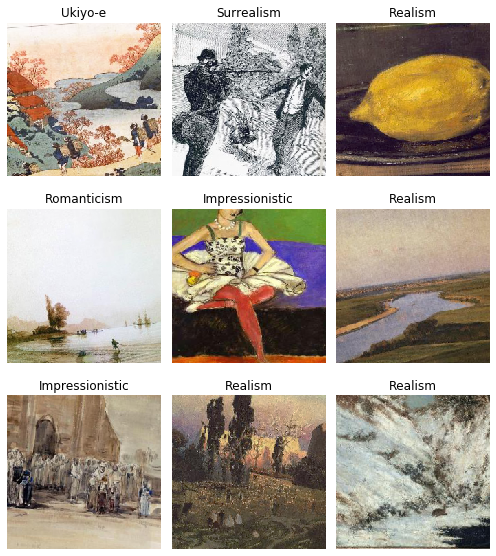

In [14]:
data_style.show_batch(rows=3, figsize=(7,8))

In [15]:
data_style.classes, data_style.c, len(data_style.train_ds), len(data_style.valid_ds)

(['Art Deco',
  'Art Nouveau (Modern)',
  'Cubism',
  'Expressionism',
  'Impressionistic',
  'Magic Realism',
  'Naïve Art (Primitivism)',
  'Neoclassicism',
  'Realism',
  'Romanticism',
  'Surrealism',
  'Symbolism',
  'Ukiyo-e'],
 13,
 17411,
 4352)

## Train model

In [16]:
learn = cnn_learner(data_style, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 36.3MB/s]


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.661780,1.228529,0.395680,22:05
1,1.252594,1.032974,0.356847,02:38
2,1.066250,0.952627,0.326746,02:37
3,0.937296,0.910903,0.311121,02:38


In [18]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


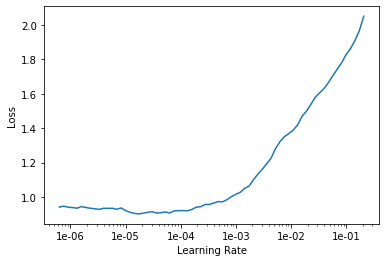

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(10, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.893213,0.877414,0.300322,02:41
1,0.842103,0.860829,0.292279,02:41
2,0.815659,0.849088,0.291131,02:40
3,0.684663,0.830455,0.278722,02:33
4,0.568568,0.850814,0.274816,02:32
5,0.440144,0.812198,0.252068,02:32
6,0.305485,0.821427,0.250000,02:31
7,0.208148,0.831181,0.242647,02:31
8,0.146057,0.840153,0.246553,02:31
9,0.125311,0.837260,0.243796,02:32


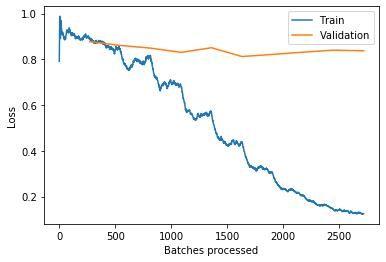

In [21]:
learn.recorder.plot_losses() 

## Interpretation

In [0]:
#learn.load(base_dir + 'models/stage-2');

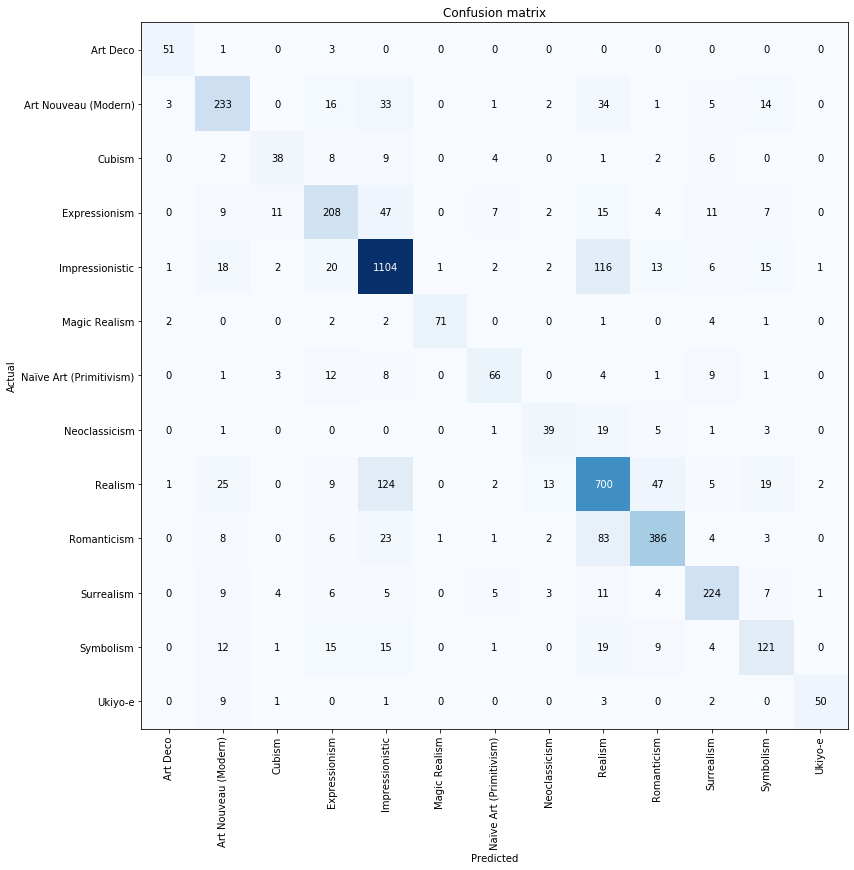

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

In [0]:
#!git clone https://github.com/muellerzr/ClassConfusion
#from ClassConfusion import *
#classlist = ['kids_art', 'delaunay']
#ClassConfusion(interp, classlist)

## Adapt model to new labels

Adjust to use create_cnn_model
https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L57
https://github.com/PPPW/deep-learning-random-explore/blob/master/CNN_archs/cnn_archs.ipynb

In [0]:
genre_labels = art_info[['path','genre_mod']]
genre_labels.columns = ['path', 'label']
genre_labels = genre_labels.sample(frac=sample_size)

In [0]:
np.random.seed(1)
data_genre = ImageDataBunch.from_df(path, genre_labels, 
                              valid_pct=0.2,
                              ds_tfms=get_transforms(), 
                              size=224, 
                              num_workers=4).normalize(imagenet_stats)

In [27]:
learn_genre = cnn_learner(data_genre, models.resnet50, metrics=error_rate)
learn_genre.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.310541,0.962611,0.301241,02:23
1,0.981317,0.811667,0.268153,02:23
2,0.859027,0.727254,0.247702,02:24
3,0.725926,0.705074,0.241268,02:25


In [28]:
learn_genre.unfreeze()
learn_genre.fit_one_cycle(10, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.715159,0.685596,0.228171,02:30
1,0.722626,0.686701,0.231388,02:30
2,0.689211,0.746428,0.238281,02:28
3,0.606599,0.682521,0.229090,02:30
4,0.510623,0.745813,0.235294,02:30
5,0.380776,0.720672,0.221737,02:30
6,0.279034,0.710889,0.209559,02:30
7,0.196063,0.739302,0.219439,02:30
8,0.143159,0.750372,0.208180,02:31
9,0.118086,0.753306,0.209559,02:28


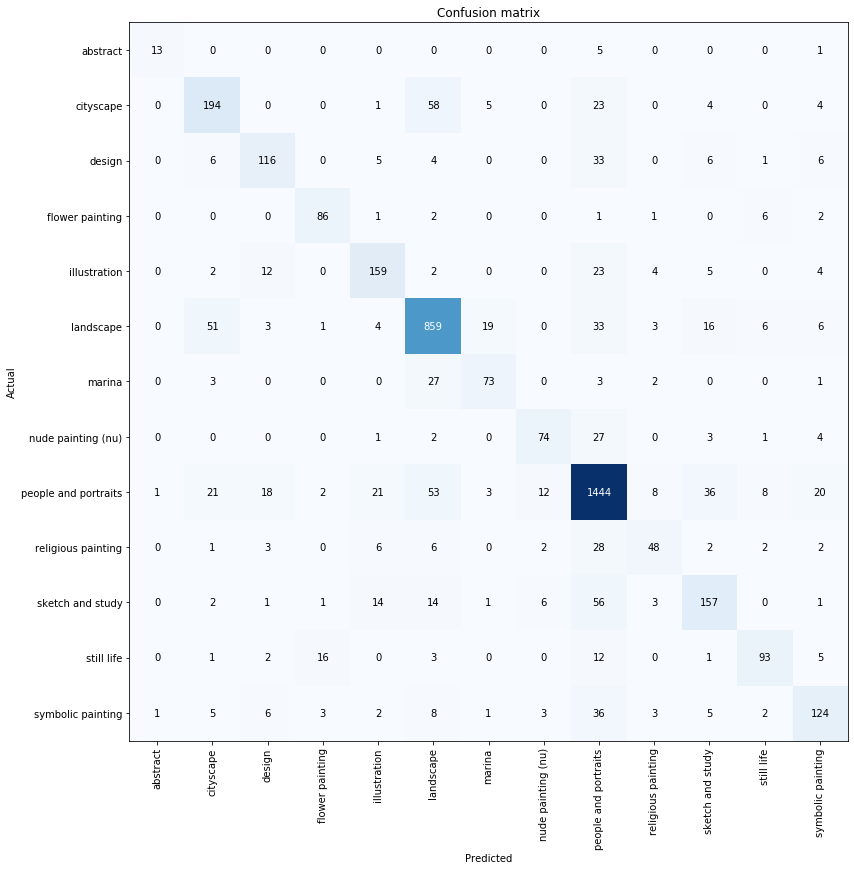

In [29]:
interp_genre = ClassificationInterpretation.from_learner(learn_genre)
interp_genre.plot_confusion_matrix(figsize=(12,12))

## Artist recognition

In [0]:
artist_labels = art_info[['path','artist']]
artist_labels.columns = ['path', 'label']
artist_labels = artist_labels.sample(frac=sample_size)

In [0]:
np.random.seed(1)
data_artist = ImageDataBunch.from_df(path, artist_labels, 
                              valid_pct=0.2,
                              ds_tfms=get_transforms(), 
                              size=224, 
                              num_workers=4).normalize(imagenet_stats)

In [0]:
#data_artist.show_batch(rows=3, figsize=(7,8))

In [33]:
learn_artist = cnn_learner(data_artist, models.resnet50, metrics=error_rate)
learn_artist.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.005997,2.178054,0.539752,02:21
1,2.263302,1.789210,0.451287,02:20
2,1.836984,1.548122,0.399586,02:20
3,1.530528,1.492252,0.386259,02:20


In [34]:
learn_artist.unfreeze()
learn_artist.fit_one_cycle(10, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.413889,1.427509,0.371324,02:25
1,1.358312,1.356960,0.361213,02:24
2,1.255292,1.309554,0.343750,02:23
3,1.095038,1.247360,0.335708,02:23
4,0.879519,1.173409,0.308134,02:23
5,0.675483,1.104470,0.294807,02:22
6,0.484300,1.050123,0.275735,02:24
7,0.374102,1.031026,0.274816,02:23
8,0.279281,1.010498,0.264476,02:23
9,0.248940,1.013321,0.267923,02:24


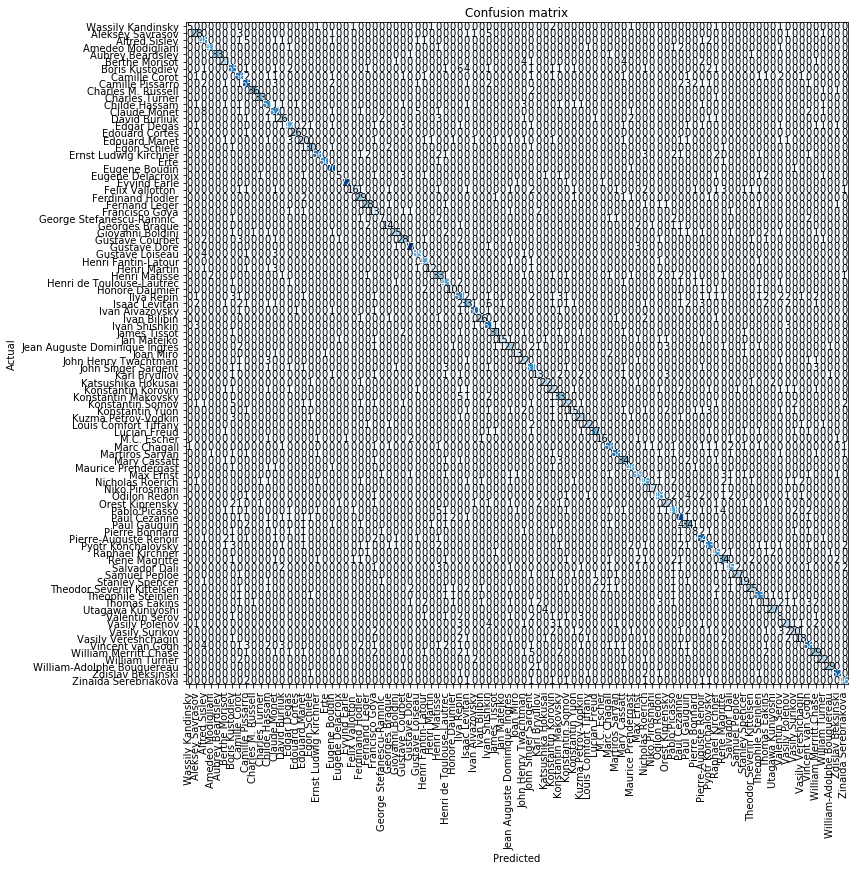

In [35]:
interp_artist = ClassificationInterpretation.from_learner(learn_artist)
interp_artist.plot_confusion_matrix(figsize=(12,12))

## Save models

In [0]:
learn.save(base_dir + 'models/style-2')
learn_genre.save(base_dir + 'models/genre-2')
learn_artist.save(base_dir + 'models/artist-2')

In [37]:
learn.load(base_dir + 'models/style-2')
learn_genre.load(base_dir + 'models/genre-2')
learn_artist.load(base_dir + 'models/artist-2')

Learner(data=ImageDataBunch;

Train: LabelList (17411 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Giovanni Boldini,Vasily Polenov,Konstantin Korovin,Zinaida Serebriakova,Pyotr Konchalovsky
Path: /content/gdrive/My Drive/Personal_projects/Art;

Valid: LabelList (4352 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Henri de Toulouse-Lautrec,Marc Chagall,Odilon Redon,Edgar Degas,Ernst Ludwig Kirchner
Path: /content/gdrive/My Drive/Personal_projects/Art;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (

## Cleaning up

In [0]:
#from fastai.widgets import *

#losses, idxs = interp.top_losses()
#top_loss_paths = data.valid_ds.x[idxs]

#ds, idxs = DatasetFormatter().from_toplosses(learn)


In [0]:
#ImageCleaner(ds, idxs, path)